In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv('/content/Automobile price data _Raw_.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
df.replace("?", np.nan, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses: ", avg_norm_loss)

avg_bore = df['bore'].astype('float').mean(axis=0)
print("Average of bore: ", avg_bore)

avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

avg_peakrpm = df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average of normalized-losses:  122.0
Average of bore:  3.3297512437810957
Average of stroke: 3.2554228855721337
Average horsepower: 104.25615763546799
Average peak rpm: 5125.369458128079


In [ ]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
df["stroke"].replace(np.nan, avg_stroke, inplace = True)
df["bore"].replace(np.nan, avg_bore, inplace=True)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [ ]:

df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [ ]:
#four has more frequency

In [ ]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [ ]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [ ]:
#drop all rows which does not have price data

In [ ]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
#correct data format
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
#As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.

In [ ]:
#changing its type
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [ ]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [ ]:
  #data standerdization
  #where we subtract the mean and divide by the standard deviation
  #covertiung miles per galloon to 100km per litre
  #The formula for unit conversion is
  #L/100km = 235 / mpg
  

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [ ]:
df['city-L/100km'] = 235/df["city-mpg"]
#changing name of column as well

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [ ]:
df["highway-mpg"] = 235/df["highway-mpg"]

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


In [ ]:
#data normalizing data
#transforming values of several variables into a similar range
#Target:would like to Normalize those variables so their value ranges from 0 to 1.

#Approach: replace original value by (original value)/(maximum value)

In [ ]:
df['length'] = df['length'] / df['length'].max()
df['width'] = df['width'] / df['width'].max()
df['height'] = df['height'] / df['height'].max()

In [ ]:
# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


In [ ]:
#Here we can see, we've normalized "length", "width" and "height" in the range of [0,1]

In [ ]:
#Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

In [ ]:
#Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

In [ ]:
#exploratory data analysis
df["horsepower"] = df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

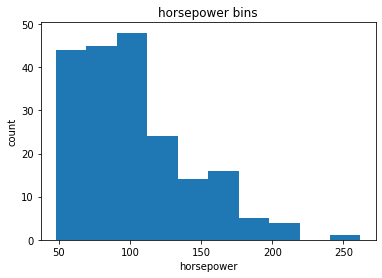

In [ ]:
plt.hist(df["horsepower"])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [ ]:
# We would like 3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated function.

# Since we want to include the minimum value of horsepower we want to set start_value=min(df["horsepower"]).

# Since we want to include the maximum value of horsepower we want to set end_value=max(df["horsepower"]).

# Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [ ]:
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [ ]:

#Lets see the number of vehicles in each bin.

In [ ]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

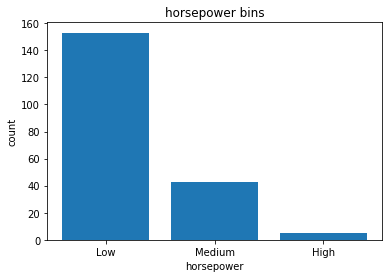

In [ ]:
plt.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [ ]:
#We successfully narrow the intervals from 57 to 3!

In [ ]:
#from the above anyalsis we coud conclude that the number of cars with  high horsepower where comparitevly less than that of low horsepowered vehicles in 1980's

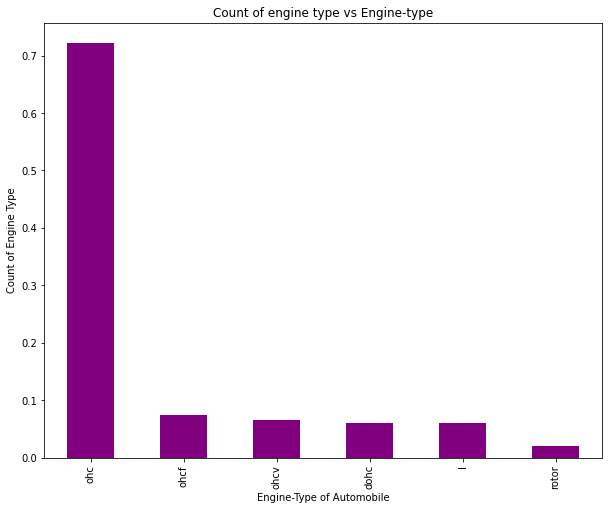

In [ ]:
plt.figure(1)
plt.subplot()
df['engine-type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='purple')
plt.title("Count of engine type vs Engine-type")
plt.ylabel('Count of Engine Type')
plt.xlabel('Engine-Type of Automobile');

In [ ]:
#from the above graph i,e Count of engine type verus the engine type, we could analysize that the no of automobiles of engine type ohc has more frequency than that of other
#which corresonds to 0.7 i,e 70% cars has the engine ohc type

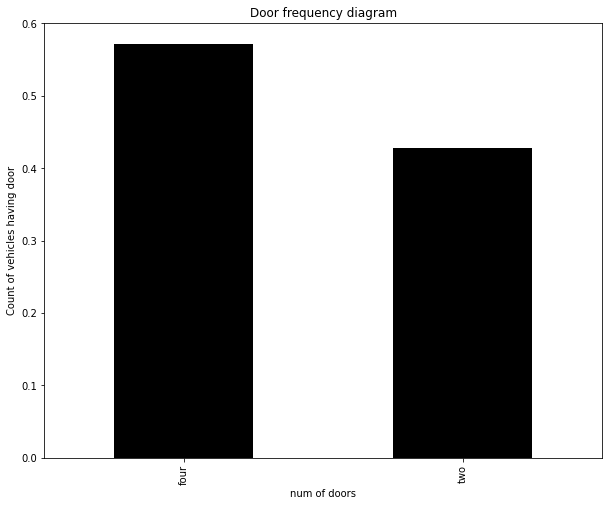

In [ ]:
plt.subplot()
df['num-of-doors'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='black')
plt.title("Door frequency diagram")
plt.ylabel('Count of vehicles having door')
plt.xlabel('num of doors');

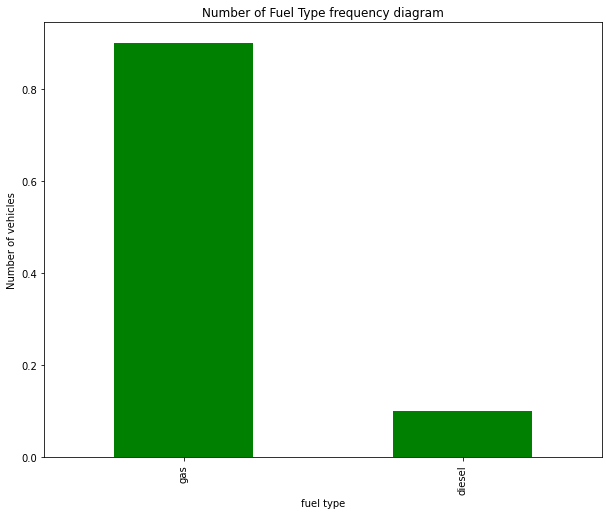

In [ ]:

#from above figure we can conclude that the vehicles with four door where more common in 1985
#0.57 i,e 57% of the cars has 4 doors
plt.subplot()
df['fuel-type'].value_counts(normalize= True).plot(figsize=(10,8),kind='bar',color='green')
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuel type');

In [ ]:

#from the above graph most of the vehicles where using gas as a fuel
#Gas is preferred by 85 % of the vehicles

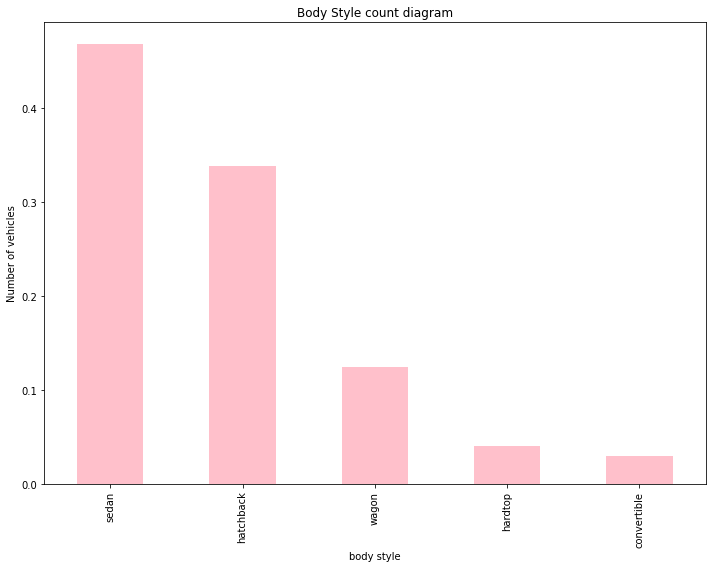

In [ ]:
plt.subplot()
df['body-style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='pink')
plt.title("Body Style count diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('body style');
plt.tight_layout()
plt.show()

In [ ]:
#we can infer that the most of the vehicles had the sedan body style which is 48%
#followed by hatchback which is around 32%

In [ ]:
#price analysis of cars

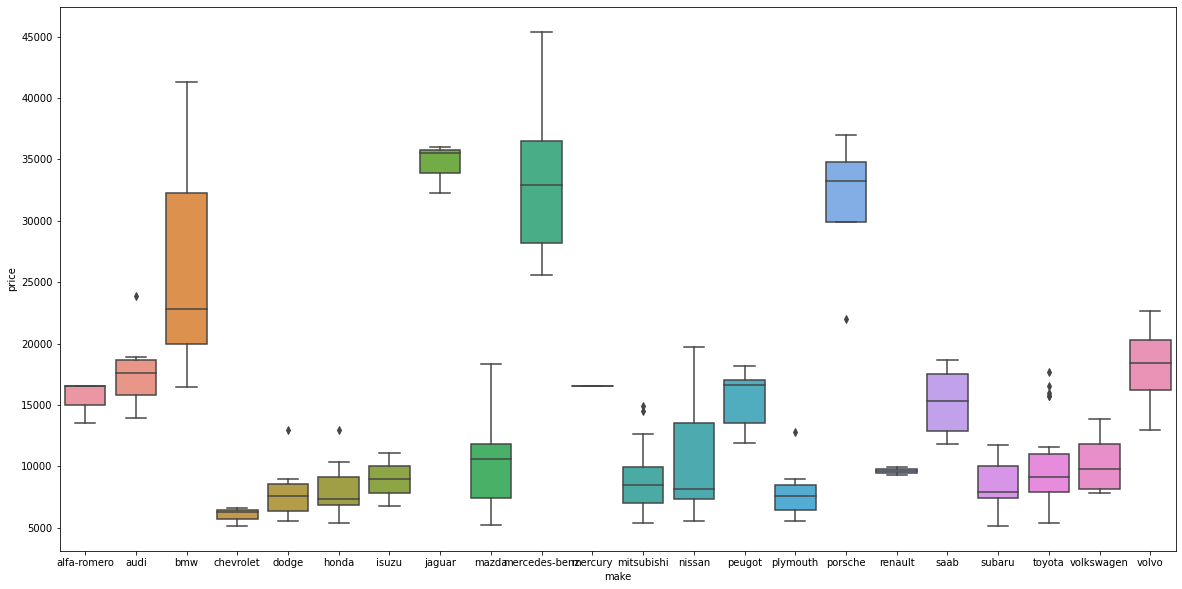

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize']=(20,10)

ax = sns.boxplot(x="make", y="price", data=df)

In [ ]:

#from the above figue we can infer that
#Mercedez-Benz ,BMW, Jaguar, Porshe produces expensive cars more than 25000
#it is clearly represented with orange color box
#cheverolet,dodge, honda,mitbushi, nissan,plymouth subaru,toyata where companies produce low budget cars
#most of the cars comapany produces car in range below 25000


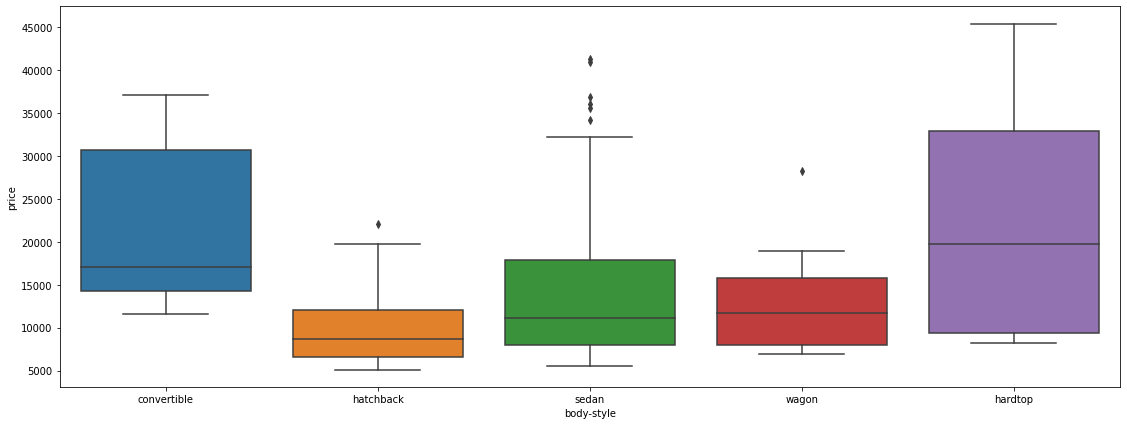

In [ ]:
plt.rcParams['figure.figsize']=(19,7)
ax = sns.boxplot(x="body-style", y="price", data=df)

In [ ]:
#we can infer that the cars with hardtop body styles where more expensive has price more than 30k. followed by convertible body style and sedan
#the hatchback body styled vehicles where the low budgets ones
#hatchback and sedan turbo models are available below 20000

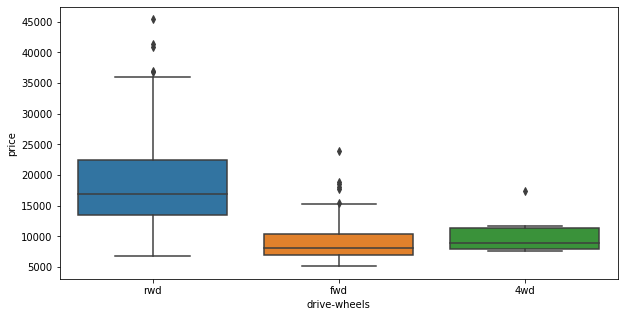

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=df)

In [ ]:
#rwd wheel drive vehicle have expensive prices

In [ ]:
graph = sns.pairplot(df[["city-mpg", "horsepower", "engine-size", "curb-weight","price", "fuel-type"]], hue="fuel-type", diag_kind="hist")

In [ ]:
#price analysis
#price decrease with increase in city-mpg, since most of the expensive vehicles does not give good milage
#(refer price vs city-mpg)
#price increase with the increase in horsepower (refer price vs horsepower)
#price increases with increase in the engine size of the car (curve goes higher with increase in engine size , refer price vs engine-size)
#vehicles with low horse power are likely to provide more milage(refer horse-power vs city mpg)
df

In [ ]:
#linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score   # for mean ,vairance and diff from pred and actual
from sklearn.metrics import accuracy_score

In [ ]:
#encode text to integer value in num-of-cylinder
df

In [ ]:
#Seond method
#droping not necessary colummns(Attributes)
df.drop(['make','symboling','normalized-losses','horsepower-binned'],axis=1,inplace=True)   #drop un unsed values in data 
df.head()

In [ ]:
col=['body-style','drive-wheels','engine-location','engine-type','fuel-system','num-of-doors','aspiration',
     'fuel-type','num-of-cylinders']
df=pd.get_dummies(df,columns=col,drop_first=True)

In [ ]:
df

In [ ]:
train,test=train_test_split(df,test_size=0.2,random_state=0)

In [ ]:
y_train=train.price
y_test=test.price
train.drop('price',axis=1,inplace=True) #dropping the price
test.drop('price',axis=1,inplace=True)

In [ ]:
train

In [ ]:
df.head()

In [ ]:
#Make Model Linearregression
regressor=LinearRegression()
regressor.fit(train,y_train)

y_pred=regressor.predict(test)


In [ ]:
actual_data=np.array(y_test)
for i in range(len(y_pred)):
    expl=((actual_data[i]-y_pred[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}------Predicted value ${:,.2f}'.format(actual_data[i],y_pred[i],expl))


In [ ]:
#calc perforamnce of Data in train and test
r_square=r2_score(y_test,y_pred)*100.0  #in LinearRegression not exist accuracy exist the r2_square to calc diff**2 between predict and actual 
r_train=r2_score(y_train,regressor.predict(train))*100.0
print('Accuracy of Test,Predict  Data  is {:,.2f} %'.format(r_square))
print('Accuracy of Train Data is {:,.2f} %'.format(r_train))

In [ ]:
#predicted versus test
plt.scatter(y_pred,y_test,color='blue')
plt.title('Automobile Data set Represntation')
plt.show()

In [ ]:
#using stociastric descent

In [ ]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor()
sgdr.fit(train,y_train)

In [ ]:
y_pred=sgdr.predict(test)


In [ ]:
actual_data=np.array(y_test)
for i in range(len(y_pred)):
    expl=((actual_data[i]-y_pred[i])/actual_data[i])*100.0
    print('Actual Value Rs. {:,.2f},Predicted value Rs. {:,.2f}'.format(actual_data[i],y_pred[i],expl))

In [ ]:
r_square=r2_score(y_test,y_pred)*100.0  #in LinearRegression not exist accuracy exist the r2_square to calc diff**2 between predict and actual 
r_train=r2_score(y_train,sgdr.predict(train))*100.0
print('Accuracy of Test,Predict  Data  is {:,.2f} %'.format(r_square))
print('Accuracy of Train Data is {:,.2f} %'.format(r_train))

In [ ]:
#using Support Vector Machines
from sklearn import svm
SVM = svm.SVC()
SVM.fit(train,y_train)

In [ ]:
y_predict = SVM.predict(test)

In [ ]:
actual_data=np.array(y_test)
for i in range(len(y_predict)):
    expl=((actual_data[i]-y_predict[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}----------Predicted value ${:,.2f}'.format(actual_data[i],y_predict[i],expl))
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# print(confusion_matrix(y_test,y_predict))
# print(classification_report(y_test,y_predict))

In [ ]:
r_square=r2_score(y_test,y_predict)*100.0  #in LinearRegression not exist accuracy exist the r2_square to calc diff**2 between predict and actual 
r_train=r2_score(y_train,SVM.predict(train))*100.0
print('Accuracy of Test,Predict  Data  is {:,.2f} %'.format(r_square))
print('Accuracy of Train Data is {:,.2f} %'.format(r_train))

In [ ]:
plt.scatter(y_predict,y_test,color='blue')
plt.title('Automobile Data set Represntation')
plt.show()
#its not better than linear regression

In [ ]:
#using decision tree regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(train, y_train)


In [ ]:
y_prediction=regr.predict(test)

In [ ]:
actual_data=np.array(y_test)
for i in range(len(y_prediction)):
    expl=((actual_data[i]-y_prediction[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}------------Predicted value ${:,.2f}'.format(actual_data[i],y_prediction[i],expl))

In [ ]:
r_square=r2_score(y_test,y_prediction)*100.0  #in LinearRegression not exist accuracy exist the r2_square to calc diff**2 between predict and actual 
r_train=r2_score(y_train,regr.predict(train))*100.0
print('Accuracy of Test,Predict  Data  is {:,.2f} %'.format(r_square))
print('Accuracy of Train Data is {:,.2f} %'.format(r_train))

In [ ]:
plt.scatter(y_prediction,y_test,color='blue')
plt.title('Automobile Data set Represntation')
plt.show()

plt.scatter(y_train,regr.predict(train),color='blue')
plt.title('Automobile Data set Represntation')
plt.show()